# Merge and read csv_files

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Show the combined DataFrame
df = df[df["Experiment"] == "FR_pause"]
df.head()

,Name,Experiment,Trial,Sequence,Recall
60,liv,FR_pause,1,p b c n y j o d x s t h g z f,p b c r y o d x f
61,liv,FR_pause,2,c u g p a j d r s f e k z q l,c u g p a j x
62,liv,FR_pause,3,a q k h s v e c y p j d i o f,a q k r s i d f
63,liv,FR_pause,4,h i j k r g m s q e t u l o p,h i j k m s p u l o
64,liv,FR_pause,5,j k e s i p r u o d a y v h n,j k e s p r o u d


# Get positions and amount of correct recall

In [2]:
def add_position_and_correct_guesses(df, sequence_col="Sequence", recall_col="Recall"):
    # Helper function to get correct positions as a string
    def get_positions(row):
        s = row[sequence_col].split()
        r = row[recall_col].split()
        positions = []
        for i, word in enumerate(s):
            if word in r:
                positions.append(str(i))
        return " ".join(positions)

    # Add column with correct positions
    df["Position correct recall"] = df.apply(get_positions, axis=1)
    # Add column with amount of correct guesses
    df["Amount of correct guesses"] = df["Position correct recall"].apply(lambda x: len(x.split()))
    return df

df = add_position_and_correct_guesses(df)
df.head()

,Name,Experiment,Trial,Sequence,Recall,Position correct recall,Amount of correct guesses
60,liv,FR_pause,1,p b c n y j o d x s t h g z f,p b c r y o d x f,0 1 2 4 6 7 8 14,8
61,liv,FR_pause,2,c u g p a j d r s f e k z q l,c u g p a j x,0 1 2 3 4 5,6
62,liv,FR_pause,3,a q k h s v e c y p j d i o f,a q k r s i d f,0 1 2 4 11 12 14,7
63,liv,FR_pause,4,h i j k r g m s q e t u l o p,h i j k m s p u l o,0 1 2 3 6 7 11 12 13 14,10
64,liv,FR_pause,5,j k e s i p r u o d a y v h n,j k e s p r o u d,0 1 2 3 5 6 7 8 9,9


# Primacy and recency effect

In [3]:
# Total amount of FR experiments done
amount_of_experiments = df.shape[0]
print("Amount of FR experiments:", amount_of_experiments)

# Combine the lists of the correct positions to 1 big list
all_correct_positions= []
for row in df["Position correct recall"]:
    row = row.split()
    all_correct_positions.extend(row)
all_correct_positions = [int(x) for x in all_correct_positions]

# Average correct
average_correct = len(all_correct_positions) / amount_of_experiments
print("Average ammount of correct per experiment:", average_correct)

# Count of correct guesses for each position
correct_per_position= [all_correct_positions.count(position) for position in range(15)]

# Percent correct at each position out of all experiments
position_correct_percent = [corrects/amount_of_experiments*100 for corrects in correct_per_position] 

Amount of FR experiments: 81
Average ammount of correct per experiment: 8.123456790123457


In [7]:
print(position_correct_percent)

[65.4320987654321, 60.49382716049383, 62.96296296296296, 50.617283950617285, 54.32098765432099, 38.2716049382716, 39.50617283950617, 43.20987654320987, 44.44444444444444, 55.55555555555556, 49.382716049382715, 55.55555555555556, 62.96296296296296, 58.0246913580247, 71.60493827160494]


Text(0.5, 1.0, 'Free Recall with Pause')

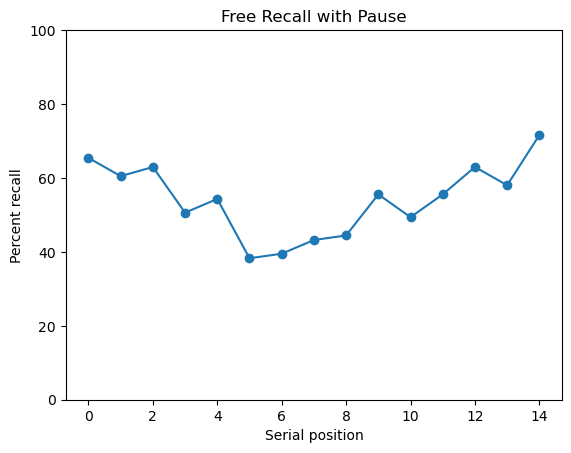

In [4]:
plt.plot(position_correct_percent, marker="o")
plt.xlabel("Serial position")
plt.ylim(0,100)
plt.ylabel("Percent recall")
plt.title("Free Recall with Pause")

# Confidence Interval for amount of correct guesses

In [5]:
num_correct_in_experiments=df["Amount of correct guesses"].to_numpy()
num_correct_in_experiments

array([ 8,  6,  7, 10,  9,  9, 10,  8, 10,  6,  9,  9,  7,  8,  8,  7,  8,
        9, 10,  8,  4,  4,  4,  6,  7,  6,  8,  6,  8,  7, 10,  7,  8,  6,
        6,  8,  9,  5,  8,  6,  7,  9, 14, 12,  9, 12,  9, 12, 10,  9, 11,
        9,  9, 10,  9, 11,  7, 11,  9, 10, 12,  8,  9,  6,  6,  7,  5,  7,
        8,  4,  6,  8,  8,  6,  9, 10,  8,  8,  8,  9,  8], dtype=int64)

In [6]:
x=num_correct_in_experiments
stats.ttest_1samp(x,popmean= np.mean(x)).confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=7.682074377993381, high=8.564839202253534)

The mean of correct guesses for the pause free recall is \n
$[7.68:8.56]$